In [97]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
data=pd.read_csv("/content/drive/MyDrive/bank.csv",delimiter=";",header='infer')
pd.set_option('display.max_columns',None) 
data.shape

(4521, 17)

In [98]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [99]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [100]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no


In [101]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [102]:
job=data['job'].unique()
marital = data['marital'].unique()
education = data['education'].unique()
default = data['default'].unique()
housing = data['housing'].unique()
loan = data['loan'].unique()
contact = data['contact'].unique()
poutcome = data['poutcome'].unique()
y = data['y'].unique()
y

array(['no', 'yes'], dtype=object)

In [103]:
data['job'] = LE.fit_transform(data['job'])
data['marital'] = LE.fit_transform(data['marital'])
data['education'] = LE.fit_transform(data['education'])
data['default'] = LE.fit_transform(data['default'])
data['housing'] = LE.fit_transform(data['housing'])
data['loan'] = LE.fit_transform(data['loan'])
data['contact']= LE.fit_transform(data['contact'])
data['poutcome'] = LE.fit_transform(data['poutcome'])
data['y']= LE.fit_transform(data['y'])

In [104]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0,0


In [105]:
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [106]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [107]:
X=data.iloc[:,:-1]#X
Y=data.iloc[:,-1]#Y

In [108]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3


In [109]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std.var(axis=1))
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_pca = pca.fit_transform(X_std)


[0.76909759 1.83767735 1.33174676 ... 0.90467306 0.89599018 2.06270406]


In [110]:
x_pca.shape

(4521, 10)

In [111]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, Y,test_size=0.2,random_state=1000)

In [112]:
X_train.shape

(3616, 10)

In [113]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc = SVC(C=1,kernel='linear')
print('SVM score:',cross_val_score(svc, X_train, Y_train, scoring='accuracy',cv=10).mean())


SVM score: 0.8877228692551384


In [114]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(10,)))#加入第一層hidden Layer神經元數(維度)為50，inputshape為10，激勵函數為sigmoid
model.add(Dense(30, activation='sigmoid'))#加入第二層hidden Layer神經元數(維度)為30，inputshape為50，激勵函數為sigmoid
model.add(Dense(1, activation='sigmoid'))#加入Output Layer 神經元數(維度)為1，inputshape為30，，激勵函數為sigmoid
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])#優化器為adam,loss為binary_crossentropy,metrics為accuracy
history = model.fit(X_train, Y_train, epochs=100, batch_size=20)#開始訓練,epoch為100,batch_size為20
model.summary()#輸出模型架構
test_los,test_acc=model.evaluate(X_test, Y_test)#準確率




Epoch 1/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8877
Epoch 2/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8874
Epoch 3/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8891
Epoch 4/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8908
Epoch 5/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.8905
Epoch 6/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8897
Epoch 7/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8913
Epoch 8/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.8913
Epoch 9/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8927
Epoch 10/100
181/181 [==============================] - 0s 2ms/step - loss: 0.2565 - accura

In [115]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model_1=Sequential()
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, Y_train, epochs=100,batch_size=20)


Epoch 1/100
181/181 [==============================] - 0s 2ms/step - loss: 0.9206 - accuracy: 0.5376
Epoch 2/100
181/181 [==============================] - 0s 2ms/step - loss: 0.7728 - accuracy: 0.5915
Epoch 3/100
181/181 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.6607
Epoch 4/100
181/181 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7414
Epoch 5/100
181/181 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.8252
Epoch 6/100
181/181 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8778
Epoch 7/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8899
Epoch 8/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8924
Epoch 9/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8921
Epoch 10/100
181/181 [==============================] - 0s 2ms/step - loss: 0.3112 - accura

In [116]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [117]:
model_1.evaluate(X_test, Y_test,verbose=0)


[0.2852277457714081, 0.8839778900146484]

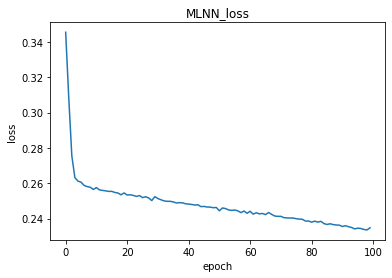

In [118]:
import matplotlib.pyplot as plt
plt.title('MLNN_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])

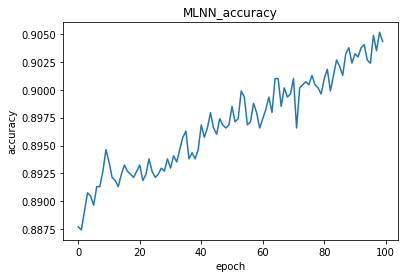

In [119]:
import matplotlib.pyplot as plt
plt.title('MLNN_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])

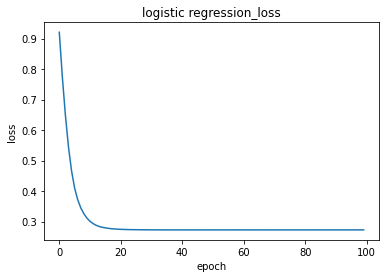

In [120]:
import matplotlib.pyplot as plt
plt.title('logistic regression_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history_1.history['loss'])

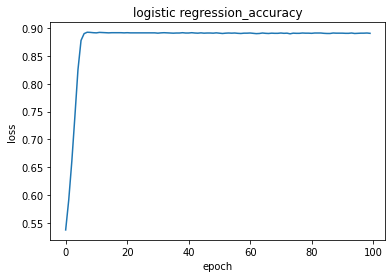

In [121]:
import matplotlib.pyplot as plt
plt.title('logistic regression_accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history_1.history['accuracy'])